In [60]:
import pandas as pd

# Step 1: Dataset paths with labels
DATASETS = {
    "fb_ads": "./period_03/2024_fb_ads_president_scored_anon.csv",
    "fb_posts": "./period_03/2024_fb_posts_president_scored_anon.csv",
    "tw_posts": "./period_03/2024_tw_posts_president_scored_anon.csv",
}

In [62]:
# Step 2: Load datasets into a dictionary
dfs = {name: pd.read_csv(path) for name, path in DATASETS.items()}

# Step 3: Extract sets of column names
column_sets = {name: set(df.columns) for name, df in dfs.items()}

# Step 4: Find common columns across all datasets
common_columns = set.intersection(*column_sets.values())

print("Common columns across all datasets:")
print(sorted(common_columns))

Common columns across all datasets:
['advocacy_msg_type_illuminating', 'attack_msg_type_illuminating', 'covid_topic_illuminating', 'cta_msg_type_illuminating', 'economy_topic_illuminating', 'education_topic_illuminating', 'engagement_cta_subtype_illuminating', 'environment_topic_illuminating', 'foreign_policy_topic_illuminating', 'fraud_illuminating', 'freefair_illuminating', 'fundraising_cta_subtype_illuminating', 'governance_topic_illuminating', 'health_topic_illuminating', 'image_msg_type_illuminating', 'immigration_topic_illuminating', 'incivility_illuminating', 'issue_msg_type_illuminating', 'lgbtq_issues_topic_illuminating', 'military_topic_illuminating', 'race_and_ethnicity_topic_illuminating', 'safety_topic_illuminating', 'scam_illuminating', 'social_and_cultural_topic_illuminating', 'technology_and_privacy_topic_illuminating', 'voting_cta_subtype_illuminating', 'womens_issue_topic_illuminating']


In [54]:
frames = []
illuminating_cols = None

for platform, path in DATASETS.items():
    df = pd.read_csv(path)

    # On first file: extract all `_illuminating` columns
    if illuminating_cols is None:
        illuminating_cols = [col for col in df.columns if col.endswith("_illuminating")]
    else:
        illuminating_cols = [col for col in illuminating_cols if col in df.columns]

    # Add platform column
    df["platform"] = platform

    # Keep only platform + illuminating columns
    keep_cols = ["platform"] + illuminating_cols
    df = df[keep_cols]

    # Convert illuminating cols to float
    for col in illuminating_cols:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    frames.append(df)  # THIS WAS MISSING

# Merge all
full_df = pd.concat(frames, ignore_index=True)

# Check platform distribution
print(full_df['platform'].value_counts())


platform
fb_ads      246745
tw_posts     27304
fb_posts     19009
Name: count, dtype: int64


In [55]:
combined_df = pd.concat(frames, ignore_index=True)
combined_df.head()

,platform,scam_illuminating,election_integrity_Truth_illuminating,advocacy_msg_type_illuminating,issue_msg_type_illuminating,attack_msg_type_illuminating,image_msg_type_illuminating,cta_msg_type_illuminating,engagement_cta_subtype_illuminating,fundraising_cta_subtype_illuminating,...,lgbtq_issues_topic_illuminating,military_topic_illuminating,race_and_ethnicity_topic_illuminating,safety_topic_illuminating,social_and_cultural_topic_illuminating,technology_and_privacy_topic_illuminating,womens_issue_topic_illuminating,incivility_illuminating,freefair_illuminating,fraud_illuminating
0,fb_ads,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,fb_ads,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,fb_ads,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,fb_ads,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,fb_ads,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [ ]:
summary_df = combined_df.groupby("platform")[illuminating_cols].mean().reset_index()

# Step 5: Save and display
summary_df.to_csv("platform_illuminating_means.csv", index=False)
print("\n=== Per-Platform Mean of Illuminating Variables ===\n")
summary_df

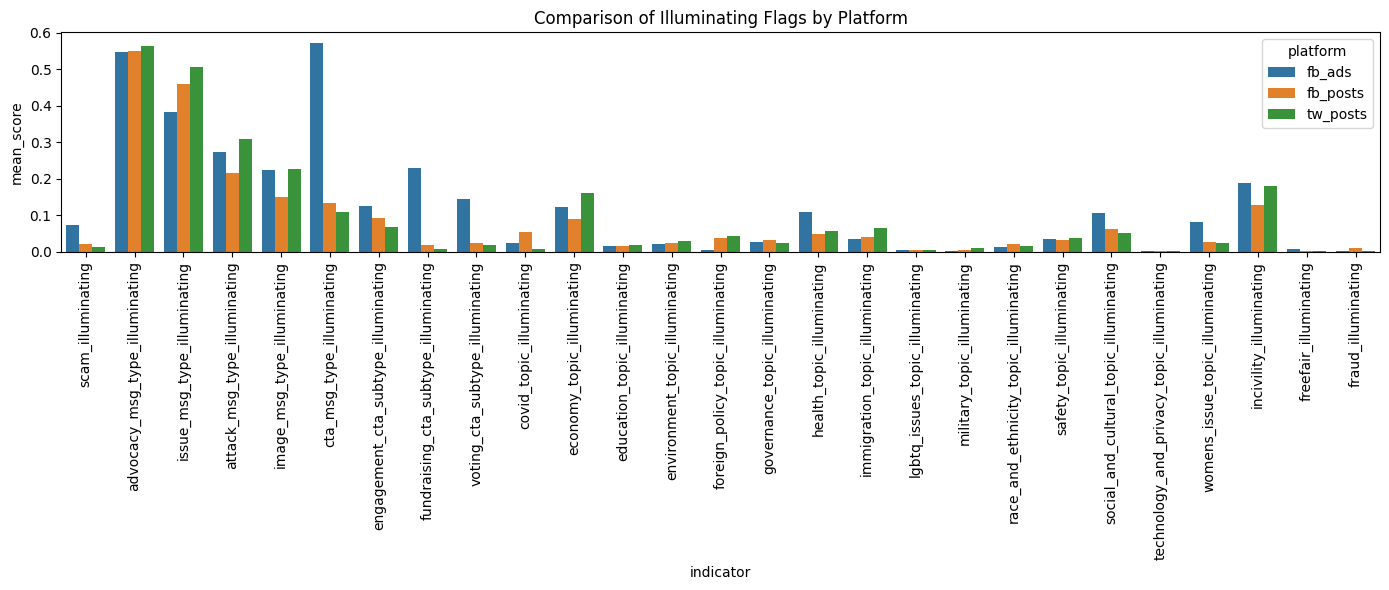

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt to long format for seaborn
df_melted = summary_df.melt(id_vars='platform', var_name='indicator', value_name='mean_score')

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x='indicator', y='mean_score', hue='platform')
plt.xticks(rotation=90)
plt.title("Comparison of Illuminating Flags by Platform")
plt.tight_layout()
plt.show()
